# Importation des Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4
import re
import copy
import collections as co
import plotly.graph_objects as go

# Premiers bails sur la base (Léo)


Téléchargement de la base de données des films et série présent sur Netflix

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [9]:
 df = pd.read_csv("/content/gdrive/My Drive/Python - Netflix/Projet Python 2A/netflix_titles.csv")

In [10]:
df.tail(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6134,80176929,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6135,80176931,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim​, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Reali...",The best chefs of Korea go head-to-head to cre...
6136,80194367,TV Show,Paranormal Survivor,NaN,NaN,Canada,"August 4, 2017",2016,TV-14,2 Seasons,Docuseries,"In interviews and reenactments, ordinary peopl..."
6137,80117552,TV Show,Ozark,NaN,"Jason Bateman, Sofia Hublitz, Laura Linney, Sk...",United States,"August 31, 2018",2018,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A financial adviser drags his family from Chic...
6138,80223138,TV Show,The Comedy Lineup,NaN,"Michelle Buteau, Ian Karmel, Taylor Tomlinson,...",United States,"August 31, 2018",2018,TV-MA,2 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",A diverse group of up-and-coming comedians per...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


La plupart des variables sont codées comme objet, il faudra recoder certaines en int pour pouvoir faire des opérations.

In [11]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


On compte le nombre de valeurs manquantes pour 'date_added' et 'release_year', les deux variables sur lesquelles on peut faire des opérations numériques (pour comparer les séries/films qui ont été créés par Netflix ou juste rachetés)


In [12]:
df[['date_added']].isna().sum()

date_added    11
dtype: int64

In [13]:
df[['release_year']].isna().sum()

release_year    0
dtype: int64

On créé une variable 'year_added' codée en int qui renseigne l'année où le film/série a été ajouté sur Netflix et on remplace les valeurs manquantes par des zéros.

In [14]:
df[['date_added']].iloc[0:6233]

,date_added
0,"September 9, 2019"
1,"September 9, 2016"
2,"September 8, 2018"
3,"September 8, 2018"
4,"September 8, 2017"
...,...
6228,NaN
6229,NaN
6230,NaN
6231,NaN


In [15]:
regex = r'([0-2][0-9][0-9][0-9])'
df['year_added'] = df['date_added'].str.extract(regex,expand=True)

In [16]:
df['year_added'] = df['year_added'].fillna(0)

In [17]:
df['year_added'] = df['year_added'].astype(str).astype(int)

In [18]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year_added       int64
dtype: object

##Création de df1 (colonnes choisies)

On crée une nouvelle base qui ne prend que certaines variables.

In [19]:
df1 = df[['type', 'title','director', 'cast', 'date_added', 'year_added', 'release_year', 'duration', 'listed_in']]

In [20]:
df1.tail(12)

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
6222,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...","April 1, 2014",2014,2012,8 Seasons,"TV Comedies, TV Dramas"
6223,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",NaN,0,2008,2 Seasons,"Anime Series, Crime TV Shows"
6224,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,NaN,0,2018,5 Seasons,Docuseries
6225,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",NaN,0,2003,11 Seasons,"Classic & Cult TV, TV Comedies"
6226,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",NaN,0,2012,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
6227,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",NaN,0,2015,2 Seasons,"Kids' TV, TV Comedies"
6228,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,0,2010,2 Seasons,Kids' TV
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",NaN,0,2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",NaN,0,2016,4 Seasons,TV Comedies
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,0,2016,60 min,Movies


On classe la base par ordre décroissant des dates de sortie.

In [21]:
df1 = df1.sort_values('release_year', ascending = False) #probleme si on veut classer selon year_added

In [22]:
df1.head()

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
3467,TV Show,Medical Police,NaN,"Erinn Hayes, Rob Huebel, Malin Akerman, Rob Co...","January 10, 2020",2020,2020,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come..."
3249,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...","January 3, 2020",2020,2020,90 min,"Comedies, International Movies, Romantic Movies"
3220,TV Show,Dracula,NaN,"Claes Bang, Dolly Wells, John Heffernan","January 4, 2020",2020,2020,1 Season,"British TV Shows, International TV Shows, TV D..."
3427,Movie,Leslie Jones: Time Machine,"David Benioff, D.B. Weiss",Leslie Jones,"January 14, 2020",2020,2020,66 min,Stand-Up Comedy
3436,TV Show,The Healing Powers of Dude,NaN,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...","January 13, 2020",2020,2020,1 Season,"Kids' TV, TV Comedies, TV Dramas"


In [23]:
df1.tail()

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
2023,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,"March 31, 2017",2017,1943,82 min,Documentaries
2022,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,"March 31, 2017",2017,1943,61 min,"Classic Movies, Documentaries"
2013,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell","March 31, 2017",2017,1942,18 min,"Classic Movies, Documentaries"
2011,Movie,Prelude to War,Frank Capra,NaN,"March 31, 2017",2017,1942,52 min,"Classic Movies, Documentaries"
4292,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,"December 30, 2018",2018,1925,1 Season,TV Shows


## Création de df_movie et df_tvshow
 On créé deux bases une avec les séries et une avec les films.

In [24]:
df_tvshow = df1[df1['type'].isin(["TV Show"])]

In [25]:
df_movie = df1[df1['type'].isin(['Movie'])]

reset index ?

In [26]:
df_tvshow.head()

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
3467,TV Show,Medical Police,NaN,"Erinn Hayes, Rob Huebel, Malin Akerman, Rob Co...","January 10, 2020",2020,2020,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come..."
3220,TV Show,Dracula,NaN,"Claes Bang, Dolly Wells, John Heffernan","January 4, 2020",2020,2020,1 Season,"British TV Shows, International TV Shows, TV D..."
3436,TV Show,The Healing Powers of Dude,NaN,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...","January 13, 2020",2020,2020,1 Season,"Kids' TV, TV Comedies, TV Dramas"
3189,TV Show,Cheer,NaN,NaN,"January 8, 2020",2020,2020,1 Season,"Docuseries, Reality TV, Teen TV Shows"
3464,TV Show,AJ and the Queen,NaN,"RuPaul Charles, Izzy G., Michael-Leon Wooley, ...","January 10, 2020",2020,2020,1 Season,"TV Comedies, TV Dramas"


In [27]:
df_tvshow.tail()

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
5704,TV Show,Star Trek,NaN,"William Shatner, Leonard Nimoy, DeForest Kelle...","October 1, 2017",2017,1968,3 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S..."
5980,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...","July 1, 2017",2017,1967,8 Seasons,"Classic & Cult TV, TV Comedies"
5981,TV Show,The Twilight Zone (Original Series),NaN,Rod Serling,"July 1, 2017",2017,1963,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy"
4079,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",NaN,"February 1, 2017",2017,1946,1 Season,TV Shows
4292,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,"December 30, 2018",2018,1925,1 Season,TV Shows


In [28]:
df_movie.head()

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
3249,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...","January 3, 2020",2020,2020,90 min,"Comedies, International Movies, Romantic Movies"
3427,Movie,Leslie Jones: Time Machine,"David Benioff, D.B. Weiss",Leslie Jones,"January 14, 2020",2020,2020,66 min,Stand-Up Comedy
3195,Movie,"Live Twice, Love Once",Maria Ripoll,"Oscar Martínez, Inma Cuesta, Mafalda Carbonell...","January 7, 2020",2020,2020,102 min,"Comedies, Dramas, International Movies"
3180,Movie,Bulletproof 2,Don Michael Paul,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...","January 9, 2020",2020,2020,97 min,"Action & Adventure, Comedies"
3518,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...","January 1, 2020",2020,2020,145 min,"Horror Movies, International Movies, Thrillers"


In [29]:
df1[df1['title'].isin(['House of Cards'])]

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
5741,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...","November 2, 2018",2018,2018,6 Seasons,"TV Dramas, TV Thrillers"


In [30]:
#df2.head()

# Webscrapping des notes ImDB des 250 mieux notés films et séries


On crée une fonction qui met dans un data frame les notes des 250 mieux notés sur ImDB (films ou séries)

In [31]:
def recup_notes(url):

  """On récupère la page internet------------------"""
  from urllib import request
  request_text = request.urlopen(url).read()
  #print(request_text[:1000]) 
  page = bs4.BeautifulSoup(request_text, "lxml")
  #print(page)


  """On récupère les données------------------"""
  tableau=page.find("table",{'class' : 'chart full-width'})
  #print(tableau)
  table_body=tableau.find('tbody')
  rows = table_body.find_all('tr')


  """On récupére les élements correspondant au titre et à la note--------------"""
  new_rows=[] #on crée une liste vide dans laquelle on va mettre le contenu des lignes
  for row in rows:
    cols = row.find_all('td')
    new_cols = []
    for ele in cols:
      new_cols.append([ele.text.strip()])
    new_cols=new_cols[1:3]
    #new_cols_title=new_cols[0]
    new_cols[0]= new_cols[0][0]
    new_cols[1]= float(new_cols[1][0])
    new_rows.append(new_cols)
  #print (new_rows)

  """On nettoie les élements pour n'avoir que des listes de titres et notes"""
  """L'élement correspondant au titre est entouré d'informations parasites, on s'en
  débarasse avec 2 regex successives"""

  regex_debut = "[\d]?[\d]?[\d]\.[\n][\s]{6}"
  regex_fin="[\n]\([1-2][\d]{3}\)"

  clean_rows=copy.copy(new_rows)

  for i in range(len(new_rows)):
    a_suppr=re.findall(regex_debut,new_rows[i][0])
    #print (a_suppr[0])
    clean_rows[i][0]=new_rows[i][0].replace(a_suppr[0],"")
  #print (clean_rows)

  really_clean_rows=copy.copy(clean_rows)

  for i in range(len(clean_rows)):
    a_suppr_fin=re.findall(regex_fin,clean_rows[i][0])
    #print (a_suppr_fin[0])
    really_clean_rows[i][0]=clean_rows[i][0].replace(a_suppr_fin[0],"")
  #print (really_clean_rows)

  """On crée un dictionnaire dans lequel on met le contenu des lignes nettoyées
  L'index est le titre, la valeur la note."""
  dico_top = dict()
  for row in really_clean_rows:
      cols=row
      dico_top[cols[0]] = cols[1:]
  dico_top

  """On crée ENFIN le dataframe"""
  df_top = pd.DataFrame.from_dict(dico_top,orient='index')
  

  """"On rajoute une index différente du titre"""
  df_top.reset_index(level=0, inplace=True)

  """On change le nom des colonnes"""
  df_top.rename(columns={'index': 'Title', 0: 'IMDb rating'}, inplace=True)

  #print(df_top)
  return (df_top)


Test sur les 2 urls

In [32]:
url_top_shows = "https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250"
url_top_movies= "https://www.imdb.com/chart/top/?ref_=nv_mv_250"

In [33]:
df_top_shows=recup_notes(url_top_shows)
df_top_shows
#problème : on a que 245 valeurs ...

,Title,IMDb rating
0,Planet Earth II,9.5
1,Planet Earth,9.4
2,Band of Brothers,9.4
3,Breaking Bad,9.4
4,Chernobyl,9.4
...,...,...
240,Guardian: The Lonely and Great God,8.4
241,Flames,8.4
242,Wentworth,8.4
243,Gintama,8.4


In [34]:
df_top_movies=recup_notes(url_top_movies)
df_top_movies

,Title,IMDb rating
0,The Shawshank Redemption,9.2
1,The Godfather,9.1
2,The Godfather: Part II,9.0
3,The Dark Knight,9.0
4,12 Angry Men,8.9
...,...,...
245,The Princess Bride,8.0
246,The Battle of Algiers,8.0
247,Tangerines,8.0
248,The Circus,8.0


# Webscrapping du top 10 netflix journalier

In [35]:
def recup_top_netflix(url):

  """On récupère la page internet------------------"""
  from urllib import request
  req = urllib.request.Request('url',headers={'User-Agent': 'Mozilla/5.0'})
  html = urllib.request.urlopen(req).read()
  page = bs4.BeautifulSoup(html, "lxml")

  """On récupère les données------------------"""
  tableau=page.find("div",{'id' : 'page_filling_chart'})
  #print(tableau)
  table_body=tableau.find('tbody')
  rows = table_body.find_all('tr')


  """On récupére les élements correspondant au titre et à la note--------------"""
  new_rows=[] #on crée une liste vide dans laquelle on va mettre le contenu des lignes
  for row in rows:
    cols = row.find_all('td')
    new_cols = []
    for ele in cols:
      new_cols.append([ele.text.strip()])
    new_cols=new_cols[1:3]
    #new_cols_title=new_cols[0]
    new_cols[0]= new_cols[0][0]
    new_cols[1]= float(new_cols[1][0])
    new_rows.append(new_cols)
  #print (new_rows)



  """On crée un dictionnaire dans lequel on met le contenu des lignes nettoyées
  L'index est le titre, la valeur la note."""
  dico_top_netflix = dict()
  for row in new_rows:
      cols=row
      dico_top_netflix[cols[0]] = cols[1:]
  dico_top_netflix

  """On crée ENFIN le dataframe"""
  df_top_netflix = pd.DataFrame.from_dict(dico_top_netflix,orient='index')
  

  """"On rajoute une index différente du titre"""
  df_top_netflix.reset_index(level=0, inplace=True)

  """On change le nom des colonnes"""
  df_top_netflix.rename(columns={'index': 'Title', 0: 'IMDb rating'}, inplace=True)

  #print(df_top)
  return (df_top_netflix)

In [36]:
url_top_netflix ="https://www.the-numbers.com/home-market/netflix-daily-chart/2020/06/07"
df_top_show=recup_top_netflix(url_top_netflix)
df_top_show

ValueError: ignored

#Travail sur les genres

##des essais peu efficaces mais que je garde au cas ou

In [ ]:
"""def clean(regex,contenu):
  sup=re.findall(regex,contenu)
  for i in range(len(sup)):
    print(i)
    contenu_clean=contenu.replace(sup[i],"")
    print(contenu_clean)
  return (contenu_clean)"""

'def clean(regex,contenu):\n  sup=re.findall(regex,contenu)\n  for i in range(len(sup)):\n    print(i)\n    contenu_clean=contenu.replace(sup[i],"")\n    print(contenu_clean)\n  return (contenu_clean)'

In [ ]:
"""def clean_virg_esp(contenu):
  contenu_conca=clean("[\s]",contenu)
  contenu_conca=clean(",",contenu_conca)
  return (contenu_conca)"""

'def clean_virg_esp(contenu):\n  contenu_conca=clean("[\\s]",contenu)\n  contenu_conca=clean(",",contenu_conca)\n  return (contenu_conca)'

On crée une fonction de nettoyage générique.

In [ ]:
def clean(regex,contenu):
  sup=re.findall(regex,contenu)
  #print(sup)
  while len(sup)>0:
    contenu_clean=contenu.replace(sup[0],"")
    return (contenu_clean)
  else:
    return(contenu)

On crée une fonction qui vire tous les esapces et virgules dans 'listed_in', revient à concaténer le contenu de chaque cellule (pour simplifier la regex ensuite).

In [ ]:
def clean_virg_esp(contenu):
  contenu_conca=clean("[\s]",contenu)
  #print(contenu_conca)
  contenu_conca=clean(",",contenu_conca)
  #print(contenu_conca)
  return (contenu_conca)

On l'applique aux deux bases

In [ ]:
#df_tvshow['listed_in']=df_tvshow['listed_in'].apply(clean_virg_esp)
#df_tvshow.head()

In [ ]:
#df_movie['listed_in']=df_movie['listed_in'].apply(clean_virg_esp)
#df_movie.head()

In [ ]:
regex

'([0-2][0-9][0-9][0-9])'

In [ ]:
#print(essai)
essai = pd.DataFrame({'title': ["Avatar, la vie", "Chernobyl , histoire", "ta mere", "pourquoi Avatar","avata,r"], 'note': [2, 10, 9,8,5]})

essai['title']=essai['title'].apply(clean_virg_esp)
essai

,title,note
0,Avatarlavie,2
1,Chernobylhistoire,10
2,tamere,9
3,pourquoiAvatar,8
4,avatar,5


##la version élégante

In [ ]:
#le fait que les types se combinent demande d'être moins bourrin
col = "listed_in"
grouped = df[col].value_counts().reset_index()
grouped

,index,listed_in
0,Documentaries,299
1,Stand-Up Comedy,273
2,"Dramas, International Movies",248
3,"Dramas, Independent Movies, International Movies",186
4,"Comedies, Dramas, International Movies",174
...,...,...
456,"Comedies, Dramas, Sports Movies",1
457,"International TV Shows, TV Mysteries, TV Thril...",1
458,"Cult Movies, Independent Movies, Thrillers",1
459,"Action & Adventure, Sports Movies",1


In [ ]:
liste2=["a", "ab", 5]
print (liste2)
liste2=liste2
print (liste2)

['a', 'ab', 5]
['a', 'ab', 5]


###count_genra(data_f)
fonction qui retourne un graph bar du nombre de titres (fils ou séries) classés dans chacun des x genres les plus populaires.

nombre : combien de genres on retient (max 22 pour les TV shows, 20 pour les films)

date : permet de changer la date dans le titre

internat: si différent de 1 omet le genre International (qui veut dire non-Américain)

In [ ]:
def count_genra (data_f,nombre=22,internat=1,date="Netflix"):
  #on récupère les catégories
  col = "listed_in"
  categories = ", ".join(data_f['listed_in']).split(", ")
  #print (categories)

  if internat != 1:
    while "International TV Shows" in categories:
      categories.remove("International TV Shows")
    while 'International Movies' in categories:
      categories.remove('International Movies')

  #print(categories)

  #On compte le nombre d'occurences de chaque type et on garde les 50 qui apparaissent le plus souvent
  counter_list = co.Counter(categories).most_common(nombre)
  #print (type(counter_list_all))

  #On conserve le premier élément de chaque couple de counter_list (ie. sur le genre) et on inverse l'ordre de la liste
  labels = [_[0] for _ in counter_list][::-1]
  #print (labels)

  #Idem pour le nombre d'occurrences
  values = [_[1] for _ in counter_list][::-1]

  trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

  data = [trace1]
  layout = go.Layout(title="Content added on "+str(date), legend=dict(x=0.1, y=1.1, orientation="h"))
  fig = go.Figure(data, layout=layout)
  fig.show()

  return(trace1)

Appliqué à la base df_tvshow

In [ ]:
count_genra(df_tvshow)

Bar({
    'marker': {'color': '#a678de'},
    'name': 'TV Shows',
    'orientation': 'h',
    'x': [10, 24, 42, 44, 44, 54, 67, 68, 69, 117, 117, 126, 132, 153, 210, 278,
          279, 328, 363, 436, 599, 1001],
    'y': [TV Shows, Classic & Cult TV, Stand-Up Comedy & Talk Shows, TV Thrillers,
          Teen TV Shows, TV Horror, Science & Nature TV, TV Sci-Fi & Fantasy, TV
          Mysteries, Anime Series, Spanish-Language TV Shows, TV Action &
          Adventure, Korean TV Shows, Reality TV, British TV Shows, Romantic TV
          Shows, Docuseries, Kids' TV, Crime TV Shows, TV Comedies, TV Dramas,
          International TV Shows]
})

Appliqué à la base df_movie

In [ ]:
count_genra(df_movie)

Bar({
    'marker': {'color': '#a678de'},
    'name': 'TV Shows',
    'orientation': 'h',
    'x': [45, 47, 55, 56, 60, 84, 157, 193, 243, 262, 281, 376, 378, 392, 552,
          597, 668, 1113, 1623, 1927],
    'y': [Anime Features, Faith & Spirituality, Cult Movies, Movies, LGBTQ Movies,
          Classic Movies, Sports Movies, Sci-Fi & Fantasy, Music & Musicals, Horror
          Movies, Stand-Up Comedy, Romantic Movies, Children & Family Movies,
          Thrillers, Independent Movies, Action & Adventure, Documentaries,
          Comedies, Dramas, International Movies]
})

### les genres dans le temps
Comme les séries sont enregistrées en tant que leur dernière saison sortie, l'analyse n'est probabelement pas pertinente.

A la limite on peut considérer que les séries qui ne sont pas arriver en 2020 sont celles qui n'ont pas eu de succès ?

A terme se focaliser sur les films.

In [ ]:
a_1=4
a_2=7
a_3=3 
a_4 = 9
liste= [a_1,a_2,a_3,a_4]
listes=[]
for i in range(1,5):
  listes.append()

TypeError: ignored

In [ ]:
df_tvshow.sort_values("year_added")
#valeurs en 2008 puis 2012-2020

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
6225,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",NaN,0,2003,11 Seasons,"Classic & Cult TV, TV Comedies"
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",NaN,0,2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",NaN,0,2016,4 Seasons,TV Comedies
6228,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,0,2010,2 Seasons,Kids' TV
6226,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",NaN,0,2012,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
...,...,...,...,...,...,...,...,...,...
6005,TV Show,Grace and Frankie,NaN,"Jane Fonda, Lily Tomlin, Martin Sheen, Sam Wat...","January 15, 2020",2020,2019,5 Seasons,"TV Comedies, TV Dramas"
3465,TV Show,Giri / Haji,NaN,"Takehiro Hira, Kelly Macdonald, Yosuke Kubozuk...","January 10, 2020",2020,2019,1 Season,"British TV Shows, Crime TV Shows, Internationa..."
6018,TV Show,Mia and Me,NaN,"Rosabell Laurenti Sellers, Adrian Moore, Saphi...","January 1, 2020",2020,2015,2 Seasons,Kids' TV
3536,TV Show,Live Up To Your Name,NaN,"Kim Nam-gil, Kim Ah-joong, Yoo Min-kyu, Moon G...","January 1, 2020",2020,2017,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."


In [ ]:
df_tvshow_2008 = df_tvshow[df_tvshow['year_added'].isin([2008])]
df_tvshow_2009 = df_tvshow[df_tvshow['year_added'].isin([2009])]
df_tvshow_2010 = df_tvshow[df_tvshow['year_added'].isin([2010])]
df_tvshow_2011 = df_tvshow[df_tvshow['year_added'].isin([2011])]
df_tvshow_2012 = df_tvshow[df_tvshow['year_added'].isin([2012])]
df_tvshow_2013 = df_tvshow[df_tvshow['year_added'].isin([2013])]
df_tvshow_2014 = df_tvshow[df_tvshow['year_added'].isin([2014])]
df_tvshow_2015 = df_tvshow[df_tvshow['year_added'].isin([2015])]
df_tvshow_2016 = df_tvshow[df_tvshow['year_added'].isin([2016])]
df_tvshow_2017 = df_tvshow[df_tvshow['year_added'].isin([2017])]
df_tvshow_2018 = df_tvshow[df_tvshow['year_added'].isin([2018])]
df_tvshow_2019 = df_tvshow[df_tvshow['year_added'].isin([2019])]
df_tvshow_2020 = df_tvshow[df_tvshow['year_added'].isin([2020])]


In [ ]:
Liste=[df_tvshow_2012,df_tvshow_2013,df_tvshow_2014,df_tvshow_2015,df_tvshow_2016,df_tvshow_2017,df_tvshow_2018,df_tvshow_2019,df_tvshow_2020]
d = 2011
for i in Liste:
  d+=1
  count_genra(i,22,1,d)

In [ ]:
df_movie.sort_values("year_added")
#2008-2020

,type,title,director,cast,date_added,year_added,release_year,duration,listed_in
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,0,2016,60 min,Movies
3742,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...","January 1, 2008",2008,2006,81 min,"Dramas, Independent Movies, Thrillers"
1237,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...","November 18, 2009",2009,2009,29 min,Horror Movies
1590,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...","May 5, 2009",2009,2007,104 min,"Dramas, International Movies"
1543,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...","November 1, 2010",2010,1987,84 min,"Cult Movies, Horror Movies"
...,...,...,...,...,...,...,...,...,...
3506,Movie,Dragonheart: A New Beginning,Doug Lefler,"Christopher Masterson, Harry Van Gorkum, Rona ...","January 1, 2020",2020,2000,84 min,"Action & Adventure, Sci-Fi & Fantasy"
3383,Movie,Where the Money Is,Marek Kanievska,"Paul Newman, Linda Fiorentino, Dermot Mulroney...","January 15, 2020",2020,2000,89 min,"Action & Adventure, Comedies, Dramas"
3445,Movie,Betty White: First Lady of Television,Steve Boettcher,"Betty White, Valerie Bertinelli, Georgia Engel...","January 12, 2020",2020,2018,56 min,Documentaries
3564,Movie,Stuart Little,Rob Minkoff,"Michael J. Fox, Jonathan Lipnicki, Geena Davis...","January 1, 2020",2020,1999,85 min,"Children & Family Movies, Comedies"


In [ ]:
df_movie_2008 = df_movie[df_movie['year_added'].isin([2008])]
df_movie_2009 = df_movie[df_movie['year_added'].isin([2009])]
df_movie_2010 = df_movie[df_movie['year_added'].isin([2010])]
df_movie_2011 = df_movie[df_movie['year_added'].isin([2011])]
df_movie_2012 = df_movie[df_movie['year_added'].isin([2012])]
df_movie_2013 = df_movie[df_movie['year_added'].isin([2013])]
df_movie_2014 = df_movie[df_movie['year_added'].isin([2014])]
df_movie_2015 = df_movie[df_movie['year_added'].isin([2015])]
df_movie_2016 = df_movie[df_movie['year_added'].isin([2016])]
df_movie_2017 = df_movie[df_movie['year_added'].isin([2017])]
df_movie_2018 = df_movie[df_movie['year_added'].isin([2018])]
df_movie_2019 = df_movie[df_movie['year_added'].isin([2019])]
df_movie_2020 = df_movie[df_movie['year_added'].isin([2020])]

In [ ]:
Liste = [df_movie_2008,df_movie_2009,df_movie_2010,df_movie_2011,df_movie_2012,df_movie_2013,df_movie_2014,df_movie_2015,df_movie_2016,df_movie_2017,df_movie_2018,df_movie_2019,df_movie_2020]
d=2007
for i in Liste:
  d+=1
  count_genra(i,22,0,d)

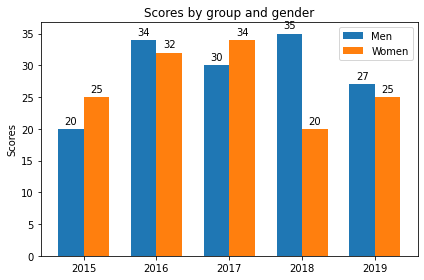

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['2015', '2016', '2017', '2018', '2019']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()